<a href="https://colab.research.google.com/github/Kzis/mrt-is/blob/master/MRT_IS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 4/zgGqjYp9xNvXVakfFyzEZb05Qfsnz3F0e8iJaTsk_-1OlH011Jo2ubk

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# df = pd.read_csv("gdrive/My Drive/NIDA/transection_.csv" , nrows=10000)
df = pd.read_csv("gdrive/My Drive/NIDA/transection_.csv")

In [4]:
df.shape

(17240769, 24)

In [5]:
df.head()

,TransactionID,TransactionDate,CardType,BusinessDay,EntryStationID,ExitStationID,TicketType,TicketName,PassengerType,StationName,LineCode,Right_StationName,Right_LineCode,DateKey,DayType,DayNumberOfMonth,EnglishDayNameOfWeek,ThaiDayNameOfWeek,EnglishMonthName,ThaiMonthName,MonthNumberOfYear,CalendarQuater,CalendarSemester,CalendarYear
0,40,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
1,69,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
2,127,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
3,129,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
4,333,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017


In [6]:
df.columns

Index(['TransactionID', 'TransactionDate', 'CardType', 'BusinessDay',
       'EntryStationID', 'ExitStationID', 'TicketType', 'TicketName',
       'PassengerType', 'StationName', 'LineCode', 'Right_StationName',
       'Right_LineCode', 'DateKey', 'DayType', 'DayNumberOfMonth',
       'EnglishDayNameOfWeek', 'ThaiDayNameOfWeek', 'EnglishMonthName',
       'ThaiMonthName', 'MonthNumberOfYear', 'CalendarQuater',
       'CalendarSemester', 'CalendarYear'],
      dtype='object')

In [7]:
df.CardType.value_counts()

1     8945627
58    5811954
4     1296077
3      520535
21     381360
60     161925
24      52314
59      28807
23      22109
2       19229
22        832
Name: CardType, dtype: int64

In [8]:
df.TicketType.value_counts()

Card     11238083
Token     6002686
Name: TicketType, dtype: int64

In [9]:
df.TicketName.value_counts()

Adult-A      8945627
Adult        5811954
Student-A    1296077
Senior-A      520535
Adult-B       381360
Senior        161925
Student-B      52314
Child          28807
Senior-B       22109
Child-A        19229
Child-B          832
Name: TicketName, dtype: int64

In [10]:
df.PassengerType.value_counts()

Adult      15138941
Student     1348391
Senior       704569
Child         48868
Name: PassengerType, dtype: int64

In [11]:
df.StationName.value_counts()

Sukhumvit                                   2247742
Phra Ram 9                                  1519359
Phetchaburi                                 1387354
Chatuchak Park                              1220946
Si Lom                                      1164985
Thailand Cultural Centre                    1129021
Huai Khwang                                 1127254
Phahon Yothin                                930277
Lat Phrao                                    921350
Hua Lamphong                                 822199
Sutthisan                                    821244
Queen Sirikit National Convention Centre     759837
Bang Sue                                     655375
Lumphini                                     589214
Sam Yan                                      583121
Ratchadaphisek                               420421
Kamphaeng Phet                               247994
Khlong Toei                                  141782
Tao Poon                                     114038
Khlong Bang 

In [12]:
df.CalendarYear.value_counts()

2017    17240769
Name: CalendarYear, dtype: int64

In [13]:
df.ThaiMonthName.value_counts()

พฤศจิกายน     1801585
กันยายน       1775869
สิงหาคม       1754984
ตุลาคม        1676494
ธันวาคม       1630557
มิถุนายน      1627196
กรกฎาคม       1606519
พฤษภาคม       1520761
เมษายน        1242435
มีนาคม         948261
มกราคม         829946
กุมภาพันธ์     826162
Name: ThaiMonthName, dtype: int64

In [14]:
jan_df = df.loc[df['ThaiMonthName'] == 'มกราคม']
jan_df.head()

,TransactionID,TransactionDate,CardType,BusinessDay,EntryStationID,ExitStationID,TicketType,TicketName,PassengerType,StationName,LineCode,Right_StationName,Right_LineCode,DateKey,DayType,DayNumberOfMonth,EnglishDayNameOfWeek,ThaiDayNameOfWeek,EnglishMonthName,ThaiMonthName,MonthNumberOfYear,CalendarQuater,CalendarSemester,CalendarYear
0,40,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
1,69,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
2,127,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
3,129,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
4,333,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017


In [ ]:
feb_df = df.loc[df['ThaiMonthName'] == 'กุมภาพันธ์']
feb_df.head()

,TransactionID,TransactionDate,CardType,BusinessDay,EntryStationID,ExitStationID,TicketType,TicketName,PassengerType,StationName,LineCode,Right_StationName,Right_LineCode,DateKey,DayType,DayNumberOfMonth,EnglishDayNameOfWeek,ThaiDayNameOfWeek,EnglishMonthName,ThaiMonthName,MonthNumberOfYear,CalendarQuater,CalendarSemester,CalendarYear
829946,834112,2017-02-01,1,2017-02-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170201,WD,1,Wednesday,พุธ,February,กุมภาพันธ์,2,1,1,2017
829947,846958,2017-02-01,1,2017-02-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170201,WD,1,Wednesday,พุธ,February,กุมภาพันธ์,2,1,1,2017
829948,847879,2017-02-01,1,2017-02-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170201,WD,1,Wednesday,พุธ,February,กุมภาพันธ์,2,1,1,2017
829949,848281,2017-02-01,1,2017-02-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170201,WD,1,Wednesday,พุธ,February,กุมภาพันธ์,2,1,1,2017
829950,849363,2017-02-01,1,2017-02-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170201,WD,1,Wednesday,พุธ,February,กุมภาพันธ์,2,1,1,2017


In [ ]:
mar_df = df.loc[df['ThaiMonthName'] == 'มีนาคม']
mar_df.head()

,TransactionID,TransactionDate,CardType,BusinessDay,EntryStationID,ExitStationID,TicketType,TicketName,PassengerType,StationName,LineCode,Right_StationName,Right_LineCode,DateKey,DayType,DayNumberOfMonth,EnglishDayNameOfWeek,ThaiDayNameOfWeek,EnglishMonthName,ThaiMonthName,MonthNumberOfYear,CalendarQuater,CalendarSemester,CalendarYear
1656108,1678663,2017-03-01,1,2017-03-01,21,21,Card,Adult-A,Adult,Hua Lamphong,BL,Hua Lamphong,BL,20170301,WD,1,Wednesday,พุธ,March,มีนาคม,3,1,1,2017
1656109,1693431,2017-03-01,1,2017-03-01,21,21,Card,Adult-A,Adult,Hua Lamphong,BL,Hua Lamphong,BL,20170301,WD,1,Wednesday,พุธ,March,มีนาคม,3,1,1,2017
1656110,1670547,2017-03-01,1,2017-03-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170301,WD,1,Wednesday,พุธ,March,มีนาคม,3,1,1,2017
1656111,1677615,2017-03-01,1,2017-03-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170301,WD,1,Wednesday,พุธ,March,มีนาคม,3,1,1,2017
1656112,1678189,2017-03-01,1,2017-03-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170301,WD,1,Wednesday,พุธ,March,มีนาคม,3,1,1,2017


In [ ]:
apr_df = df.loc[df['ThaiMonthName'] == 'เมษายน']
apr_df.head()

,TransactionID,TransactionDate,CardType,BusinessDay,EntryStationID,ExitStationID,TicketType,TicketName,PassengerType,StationName,LineCode,Right_StationName,Right_LineCode,DateKey,DayType,DayNumberOfMonth,EnglishDayNameOfWeek,ThaiDayNameOfWeek,EnglishMonthName,ThaiMonthName,MonthNumberOfYear,CalendarQuater,CalendarSemester,CalendarYear
2604369,2620546,2017-04-01,1,2017-04-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170401,WE,1,Saturday,เสาร์,April,เมษายน,4,2,1,2017
2604370,2621083,2017-04-01,1,2017-04-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170401,WE,1,Saturday,เสาร์,April,เมษายน,4,2,1,2017
2604371,2621462,2017-04-01,1,2017-04-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170401,WE,1,Saturday,เสาร์,April,เมษายน,4,2,1,2017
2604372,2621823,2017-04-01,1,2017-04-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170401,WE,1,Saturday,เสาร์,April,เมษายน,4,2,1,2017
2604373,2622145,2017-04-01,1,2017-04-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170401,WE,1,Saturday,เสาร์,April,เมษายน,4,2,1,2017


In [ ]:
may_df = df.loc[df['ThaiMonthName'] == 'พฤษภาคม']
may_df.head()

,TransactionID,TransactionDate,CardType,BusinessDay,EntryStationID,ExitStationID,TicketType,TicketName,PassengerType,StationName,LineCode,Right_StationName,Right_LineCode,DateKey,DayType,DayNumberOfMonth,EnglishDayNameOfWeek,ThaiDayNameOfWeek,EnglishMonthName,ThaiMonthName,MonthNumberOfYear,CalendarQuater,CalendarSemester,CalendarYear
3846804,3860771,2017-05-01,58,2017-05-01,21,21,Token,Adult,Adult,Hua Lamphong,BL,Hua Lamphong,BL,20170501,PH,1,Monday,จันทร์,May,พฤษภาคม,5,2,1,2017
3846805,3871150,2017-05-01,58,2017-05-01,21,21,Token,Adult,Adult,Hua Lamphong,BL,Hua Lamphong,BL,20170501,PH,1,Monday,จันทร์,May,พฤษภาคม,5,2,1,2017
3846806,3872404,2017-05-01,58,2017-05-01,21,21,Token,Adult,Adult,Hua Lamphong,BL,Hua Lamphong,BL,20170501,PH,1,Monday,จันทร์,May,พฤษภาคม,5,2,1,2017
3846807,3877365,2017-05-01,1,2017-05-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170501,PH,1,Monday,จันทร์,May,พฤษภาคม,5,2,1,2017
3846808,3883463,2017-05-01,1,2017-05-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170501,PH,1,Monday,จันทร์,May,พฤษภาคม,5,2,1,2017


In [ ]:
june_df = df.loc[df['ThaiMonthName'] == 'มิถุนายน']
june_df.head()

,TransactionID,TransactionDate,CardType,BusinessDay,EntryStationID,ExitStationID,TicketType,TicketName,PassengerType,StationName,LineCode,Right_StationName,Right_LineCode,DateKey,DayType,DayNumberOfMonth,EnglishDayNameOfWeek,ThaiDayNameOfWeek,EnglishMonthName,ThaiMonthName,MonthNumberOfYear,CalendarQuater,CalendarSemester,CalendarYear
5367565,5449020,2017-06-01,58,2017-06-01,21,21,Token,Adult,Adult,Hua Lamphong,BL,Hua Lamphong,BL,20170601,WD,1,Thursday,พฤหัสบดี,June,มิถุนายน,6,2,1,2017
5367566,5417518,2017-06-01,1,2017-06-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170601,WD,1,Thursday,พฤหัสบดี,June,มิถุนายน,6,2,1,2017
5367567,5420048,2017-06-01,1,2017-06-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170601,WD,1,Thursday,พฤหัสบดี,June,มิถุนายน,6,2,1,2017
5367568,5421079,2017-06-01,1,2017-06-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170601,WD,1,Thursday,พฤหัสบดี,June,มิถุนายน,6,2,1,2017
5367569,5422084,2017-06-01,1,2017-06-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170601,WD,1,Thursday,พฤหัสบดี,June,มิถุนายน,6,2,1,2017


In [ ]:
junly_df = df.loc[df['ThaiMonthName'] == 'กรกฎาคม']
junly_df.head()

,TransactionID,TransactionDate,CardType,BusinessDay,EntryStationID,ExitStationID,TicketType,TicketName,PassengerType,StationName,LineCode,Right_StationName,Right_LineCode,DateKey,DayType,DayNumberOfMonth,EnglishDayNameOfWeek,ThaiDayNameOfWeek,EnglishMonthName,ThaiMonthName,MonthNumberOfYear,CalendarQuater,CalendarSemester,CalendarYear
6994761,7044406,2017-07-01,1,2017-07-01,21,21,Card,Adult-A,Adult,Hua Lamphong,BL,Hua Lamphong,BL,20170701,WE,1,Saturday,เสาร์,July,กรกฎาคม,7,3,2,2017
6994762,7078104,2017-07-01,1,2017-07-01,21,21,Card,Adult-A,Adult,Hua Lamphong,BL,Hua Lamphong,BL,20170701,WE,1,Saturday,เสาร์,July,กรกฎาคม,7,3,2,2017
6994763,7027628,2017-07-01,58,2017-07-01,21,21,Token,Adult,Adult,Hua Lamphong,BL,Hua Lamphong,BL,20170701,WE,1,Saturday,เสาร์,July,กรกฎาคม,7,3,2,2017
6994764,7047958,2017-07-01,58,2017-07-01,21,21,Token,Adult,Adult,Hua Lamphong,BL,Hua Lamphong,BL,20170701,WE,1,Saturday,เสาร์,July,กรกฎาคม,7,3,2,2017
6994765,7066409,2017-07-01,58,2017-07-01,21,21,Token,Adult,Adult,Hua Lamphong,BL,Hua Lamphong,BL,20170701,WE,1,Saturday,เสาร์,July,กรกฎาคม,7,3,2,2017


In [ ]:
aug_df = df.loc[df['ThaiMonthName'] == 'สิงหาคม']
aug_df.head()

,TransactionID,TransactionDate,CardType,BusinessDay,EntryStationID,ExitStationID,TicketType,TicketName,PassengerType,StationName,LineCode,Right_StationName,Right_LineCode,DateKey,DayType,DayNumberOfMonth,EnglishDayNameOfWeek,ThaiDayNameOfWeek,EnglishMonthName,ThaiMonthName,MonthNumberOfYear,CalendarQuater,CalendarSemester,CalendarYear
8601280,8701986,2017-08-01,1,2017-08-01,21,21,Card,Adult-A,Adult,Hua Lamphong,BL,Hua Lamphong,BL,20170801,WD,1,Tuesday,อังคาร,August,สิงหาคม,8,3,2,2017
8601281,8687313,2017-08-01,1,2017-08-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170801,WD,1,Tuesday,อังคาร,August,สิงหาคม,8,3,2,2017
8601282,8687668,2017-08-01,1,2017-08-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170801,WD,1,Tuesday,อังคาร,August,สิงหาคม,8,3,2,2017
8601283,8687771,2017-08-01,1,2017-08-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170801,WD,1,Tuesday,อังคาร,August,สิงหาคม,8,3,2,2017
8601284,8687946,2017-08-01,1,2017-08-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170801,WD,1,Tuesday,อังคาร,August,สิงหาคม,8,3,2,2017


In [ ]:
sep_df = df.loc[df['ThaiMonthName'] == 'กันยายน']
sep_df.head()

,TransactionID,TransactionDate,CardType,BusinessDay,EntryStationID,ExitStationID,TicketType,TicketName,PassengerType,StationName,LineCode,Right_StationName,Right_LineCode,DateKey,DayType,DayNumberOfMonth,EnglishDayNameOfWeek,ThaiDayNameOfWeek,EnglishMonthName,ThaiMonthName,MonthNumberOfYear,CalendarQuater,CalendarSemester,CalendarYear
10356264,10409726,2017-09-01,1,2017-09-01,101,116,Card,Adult-A,Adult,Khlong Bang Phai,PPL,Tao Poon,PPL,20170901,WD,1,Friday,ศุกร์,September,กันยายน,9,3,2,2017
10356265,10410174,2017-09-01,1,2017-09-01,101,116,Card,Adult-A,Adult,Khlong Bang Phai,PPL,Tao Poon,PPL,20170901,WD,1,Friday,ศุกร์,September,กันยายน,9,3,2,2017
10356266,10412315,2017-09-01,1,2017-09-01,101,116,Card,Adult-A,Adult,Khlong Bang Phai,PPL,Tao Poon,PPL,20170901,WD,1,Friday,ศุกร์,September,กันยายน,9,3,2,2017
10356267,10415586,2017-09-01,1,2017-09-01,101,116,Card,Adult-A,Adult,Khlong Bang Phai,PPL,Tao Poon,PPL,20170901,WD,1,Friday,ศุกร์,September,กันยายน,9,3,2,2017
10356268,10441481,2017-09-01,1,2017-09-01,101,116,Card,Adult-A,Adult,Khlong Bang Phai,PPL,Tao Poon,PPL,20170901,WD,1,Friday,ศุกร์,September,กันยายน,9,3,2,2017


In [ ]:
oct_df = df.loc[df['ThaiMonthName'] == 'ตุลาคม']
oct_df.head()

,TransactionID,TransactionDate,CardType,BusinessDay,EntryStationID,ExitStationID,TicketType,TicketName,PassengerType,StationName,LineCode,Right_StationName,Right_LineCode,DateKey,DayType,DayNumberOfMonth,EnglishDayNameOfWeek,ThaiDayNameOfWeek,EnglishMonthName,ThaiMonthName,MonthNumberOfYear,CalendarQuater,CalendarSemester,CalendarYear
12132133,12196719,2017-10-01,1,2017-10-01,101,116,Card,Adult-A,Adult,Khlong Bang Phai,PPL,Tao Poon,PPL,20171001,WE,1,Sunday,อาทิตย์,October,ตุลาคม,10,4,2,2017
12132134,12199048,2017-10-01,1,2017-10-01,102,116,Card,Adult-A,Adult,Talad Bang Yai,PPL,Tao Poon,PPL,20171001,WE,1,Sunday,อาทิตย์,October,ตุลาคม,10,4,2,2017
12132135,12202797,2017-10-01,1,2017-10-01,102,116,Card,Adult-A,Adult,Talad Bang Yai,PPL,Tao Poon,PPL,20171001,WE,1,Sunday,อาทิตย์,October,ตุลาคม,10,4,2,2017
12132136,12212722,2017-10-01,1,2017-10-01,102,116,Card,Adult-A,Adult,Talad Bang Yai,PPL,Tao Poon,PPL,20171001,WE,1,Sunday,อาทิตย์,October,ตุลาคม,10,4,2,2017
12132137,12225452,2017-10-01,1,2017-10-01,102,116,Card,Adult-A,Adult,Talad Bang Yai,PPL,Tao Poon,PPL,20171001,WE,1,Sunday,อาทิตย์,October,ตุลาคม,10,4,2,2017


In [ ]:
nov_df = df.loc[df['ThaiMonthName'] == 'พฤศจิกายน']
nov_df.head()

,TransactionID,TransactionDate,CardType,BusinessDay,EntryStationID,ExitStationID,TicketType,TicketName,PassengerType,StationName,LineCode,Right_StationName,Right_LineCode,DateKey,DayType,DayNumberOfMonth,EnglishDayNameOfWeek,ThaiDayNameOfWeek,EnglishMonthName,ThaiMonthName,MonthNumberOfYear,CalendarQuater,CalendarSemester,CalendarYear
13808627,13889675,2017-11-01,1,2017-11-01,114,116,Card,Adult-A,Adult,Wong Sawang,PPL,Tao Poon,PPL,20171101,WD,1,Wednesday,พุธ,November,พฤศจิกายน,11,4,2,2017
13808628,13880306,2017-11-01,1,2017-11-01,115,116,Card,Adult-A,Adult,Bang Son,PPL,Tao Poon,PPL,20171101,WD,1,Wednesday,พุธ,November,พฤศจิกายน,11,4,2,2017
13808629,13883179,2017-11-01,21,2017-11-01,115,116,Card,Adult-B,Adult,Bang Son,PPL,Tao Poon,PPL,20171101,WD,1,Wednesday,พุธ,November,พฤศจิกายน,11,4,2,2017
13808630,13877016,2017-11-01,1,2017-11-01,101,21,Card,Adult-A,Adult,Khlong Bang Phai,PPL,Hua Lamphong,BL,20171101,WD,1,Wednesday,พุธ,November,พฤศจิกายน,11,4,2,2017
13808631,13877037,2017-11-01,1,2017-11-01,101,21,Card,Adult-A,Adult,Khlong Bang Phai,PPL,Hua Lamphong,BL,20171101,WD,1,Wednesday,พุธ,November,พฤศจิกายน,11,4,2,2017


In [ ]:
dec_df = df.loc[df['ThaiMonthName'] == 'ธันวาคม']
dec_df.head()

,TransactionID,TransactionDate,CardType,BusinessDay,EntryStationID,ExitStationID,TicketType,TicketName,PassengerType,StationName,LineCode,Right_StationName,Right_LineCode,DateKey,DayType,DayNumberOfMonth,EnglishDayNameOfWeek,ThaiDayNameOfWeek,EnglishMonthName,ThaiMonthName,MonthNumberOfYear,CalendarQuater,CalendarSemester,CalendarYear
15610212,15728328,2017-12-01,1,2017-12-01,101,21,Card,Adult-A,Adult,Khlong Bang Phai,PPL,Hua Lamphong,BL,20171201,WD,1,Friday,ศุกร์,December,ธันวาคม,12,4,2,2017
15610213,15742042,2017-12-01,21,2017-12-01,101,21,Card,Adult-B,Adult,Khlong Bang Phai,PPL,Hua Lamphong,BL,20171201,WD,1,Friday,ศุกร์,December,ธันวาคม,12,4,2,2017
15610214,15748873,2017-12-01,24,2017-12-01,101,21,Card,Student-B,Student,Khlong Bang Phai,PPL,Hua Lamphong,BL,20171201,WD,1,Friday,ศุกร์,December,ธันวาคม,12,4,2,2017
15610215,15750874,2017-12-01,58,2017-12-01,101,21,Token,Adult,Adult,Khlong Bang Phai,PPL,Hua Lamphong,BL,20171201,WD,1,Friday,ศุกร์,December,ธันวาคม,12,4,2,2017
15610216,15753001,2017-12-01,58,2017-12-01,101,21,Token,Adult,Adult,Khlong Bang Phai,PPL,Hua Lamphong,BL,20171201,WD,1,Friday,ศุกร์,December,ธันวาคม,12,4,2,2017


In [15]:
jan_df.head()

,TransactionID,TransactionDate,CardType,BusinessDay,EntryStationID,ExitStationID,TicketType,TicketName,PassengerType,StationName,LineCode,Right_StationName,Right_LineCode,DateKey,DayType,DayNumberOfMonth,EnglishDayNameOfWeek,ThaiDayNameOfWeek,EnglishMonthName,ThaiMonthName,MonthNumberOfYear,CalendarQuater,CalendarSemester,CalendarYear
0,40,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
1,69,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
2,127,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
3,129,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
4,333,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017


In [20]:
df_jan_transaction_date_sum = jan_df.TransactionDate.value_counts().rename_axis('date').reset_index(name='counts')
df_jan_transaction_date_sum.sort_values('date')
print(df_jan_transaction_date_sum)

          date  counts
0   2017-01-25   37135
1   2017-01-26   36485
2   2017-01-13   36171
3   2017-01-24   36050
4   2017-01-20   35898
5   2017-01-11   35831
6   2017-01-18   35575
7   2017-01-10   35343
8   2017-01-31   35253
9   2017-01-19   35208
10  2017-01-17   35107
11  2017-01-09   34666
12  2017-01-23   34660
13  2017-01-06   33946
14  2017-01-27   33717
15  2017-01-16   33200
16  2017-01-05   33129
17  2017-01-30   32814
18  2017-01-12   31840
19  2017-01-04   31479
20  2017-01-28   16397
21  2017-01-21   16184
22  2017-01-14   16018
23  2017-01-07   15156
24  2017-01-29   13026
25  2017-01-03   12134
26  2017-01-22   12071
27  2017-01-15   12068
28  2017-01-08   11123
29  2017-01-02    7217
30  2017-01-01    5045


In [42]:
jan_date_list = df_jan_transaction_date_sum['date'].tolist()
print(jan_date_list)

['2017-01-25', '2017-01-26', '2017-01-13', '2017-01-24', '2017-01-20', '2017-01-11', '2017-01-18', '2017-01-10', '2017-01-31', '2017-01-19', '2017-01-17', '2017-01-09', '2017-01-23', '2017-01-06', '2017-01-27', '2017-01-16', '2017-01-05', '2017-01-30', '2017-01-12', '2017-01-04', '2017-01-28', '2017-01-21', '2017-01-14', '2017-01-07', '2017-01-29', '2017-01-03', '2017-01-22', '2017-01-15', '2017-01-08', '2017-01-02', '2017-01-01']


In [ ]:
subset_df = jan_df[ (jan_df["StationName"]=="Sukhumvit") & (jan_df["TransactionDate"]=="2017-01-01") ].count()
column_count = subset_df.value_counts()

print(column_count)

In [44]:
for date in jan_date_list:
  print(date)

2017-01-25
2017-01-26
2017-01-13
2017-01-24
2017-01-20
2017-01-11
2017-01-18
2017-01-10
2017-01-31
2017-01-19
2017-01-17
2017-01-09
2017-01-23
2017-01-06
2017-01-27
2017-01-16
2017-01-05
2017-01-30
2017-01-12
2017-01-04
2017-01-28
2017-01-21
2017-01-14
2017-01-07
2017-01-29
2017-01-03
2017-01-22
2017-01-15
2017-01-08
2017-01-02
2017-01-01


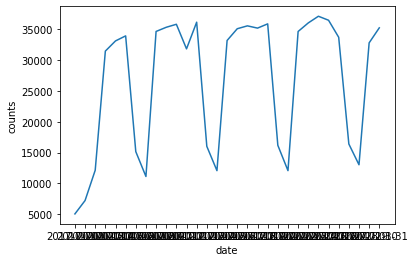

In [ ]:
sns.lineplot(x = "date", y = "counts", data=df_jan_transaction_date_sum)
plt.show()